In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Data_cleaned.csv to Data_cleaned.csv


**IMPORTING LIBRARY**

In [80]:
import csv
import pandas as pd
import numpy as np
#import pandas_profiling as pp
#from pandas_profiling import ProfileReport
from sklearn.model_selection import TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.feature_selection import SelectKBest, chi2, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot


from sklearn.metrics import confusion_matrix

In [8]:
df = pd.read_csv('Data_cleaned.csv')                #reading the data

In [14]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,Slight,2,3,2019-02-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,Slight,2,3,2019-02-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019010128300,528218.0,180407.0,-0.153842,51.508057,1,Slight,2,3,2019-02-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019010152270,530219.0,172463.0,-0.127949,51.436208,1,Slight,2,1,2019-01-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019010155191,530222.0,182543.0,-0.124193,51.526795,1,Slight,2,1,2019-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154551,2019984107019,337522.0,591682.0,-2.983499,55.215407,98,Slight,4,1,2019-05-30,...,Journey as part of work,1.0,20.0,4.0,2198.0,Heavy Oil,4.0,5.0,3.0,5.0
154552,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,Slight,2,1,2019-06-21,...,Not known,1.0,33.0,6.0,1997.0,Heavy Oil,12.0,3.0,2.0,3.0
154553,2019984107219,318544.0,567087.0,-3.274645,54.991685,98,Slight,2,1,2019-06-21,...,Not known,1.0,61.0,9.0,2967.0,Heavy Oil,5.0,7.0,3.0,7.0
154554,2019984107419,336525.0,584226.0,-2.997491,55.148292,98,Slight,1,1,2019-06-29,...,Other,1.0,78.0,11.0,1597.0,Heavy Oil,6.0,8.0,3.0,8.0


In [56]:
df1=df.copy()                                       #make a copy of the original data

In [57]:
# Dropping unnecessary columns
df1.drop(['Accident_Index', 'Longitude', 'Latitude', 'Number_of_Vehicles', 'Number_of_Casualties', 
                'Date', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Special_Conditions_at_Site', 
                'converted_time','LSOA_of_Accident_Location'], 
               axis=1, inplace=True)

In [58]:
df1.dropna()

,Location_Easting_OSGR,Location_Northing_OSGR,Police_Force,Accident_Severity,Day_of_Week,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,Road_Type,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
17,548535.0,188113.0,1,Slight,Tuesday,16,E09000002,A,1112,Single carriageway,...,Not known,2.0,81.0,11.0,1242.0,Petrol,4.0,-1.0,-1.0,-1.0
21,537356.0,183448.0,1,Fatal,Tuesday,5,E09000030,A,12,Dual carriageway,...,Journey as part of work,1.0,33.0,6.0,2198.0,Heavy Oil,4.0,-1.0,-1.0,-1.0
23,543616.0,186274.0,1,Serious,Tuesday,14,E09000026,A,118,Dual carriageway,...,Not known,3.0,38.0,6.0,1368.0,Petrol,4.0,-1.0,-1.0,-1.0
76,533271.0,186512.0,1,Slight,Wednesday,4,E09000012,C,0,Single carriageway,...,Not known,1.0,23.0,5.0,2996.0,Petrol,1.0,2.0,1.0,2.0
132,520571.0,179155.0,1,Serious,Thursday,27,E09000009,B,490,Single carriageway,...,Journey as part of work,1.0,25.0,5.0,125.0,Petrol,1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154542,341523.0,579842.0,98,Serious,Sunday,917,S12000006,B,6318,Single carriageway,...,Not known,1.0,65.0,9.0,1170.0,Petrol,13.0,10.0,1.0,10.0
154545,311177.0,574940.0,98,Serious,Tuesday,917,S12000006,C,91,Single carriageway,...,Not known,1.0,74.0,10.0,1686.0,Heavy Oil,17.0,7.0,3.0,7.0
154546,303932.0,610445.0,98,Slight,Thursday,917,S12000006,A(M),74,Dual carriageway,...,Other,2.0,68.0,10.0,1368.0,Petrol,3.0,5.0,3.0,5.0
154548,312635.0,573392.0,98,Slight,Saturday,917,S12000006,B,725,Single carriageway,...,Journey as part of work,1.0,24.0,5.0,1997.0,Heavy Oil,14.0,6.0,3.0,6.0


In [59]:
df2 =df1.apply(lambda x : x.astype('category'))                     #convert dtype to category

In [60]:
df2 =df2.apply(lambda x: x.cat.codes)                               #convert dataset to binary

In [ ]:
#define X and y for training and testing
dataset_y = df2[ 'Accident_Severity']
dataset_x = df2.drop([ 'Accident_Severity' ], axis= 1 )
X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_size= 0.20 , random_state= 42 )

**FEATURE SELECTION USING RANDOM FOREST**

In [ ]:
model = RandomForestClassifier(random_state = 42)
model.fit(X_train, y_train)

importances = model.feature_importances_
dst_X = X_train
data = dst_X.columns
t = pd.DataFrame(data, columns = ['Features'])
t['Importances'] = importances
rank_attr = t.sort_values(by=['Importances'], ascending=False)
print(rank_attr)
top50 = rank_attr[0:50]['Features']

                                       Features  Importances
25                            Casualty_Severity     0.305189
1                        Location_Northing_OSGR     0.046013
0                         Location_Easting_OSGR     0.043618
4                    Local_Authority_(District)     0.033294
49                         Engine_Capacity_(CC)     0.032770
47                                Age_of_Driver     0.029781
7                               1st_Road_Number     0.029217
51                               Age_of_Vehicle     0.028340
5                     Local_Authority_(Highway)     0.028244
3                                   Day_of_Week     0.022074
2                                  Police_Force     0.019350
36                            Vehicle_Manoeuvre     0.018689
23                              Age_of_Casualty     0.017764
54                           Vehicle_IMD_Decile     0.017602
52                            Driver_IMD_Decile     0.017513
48                      

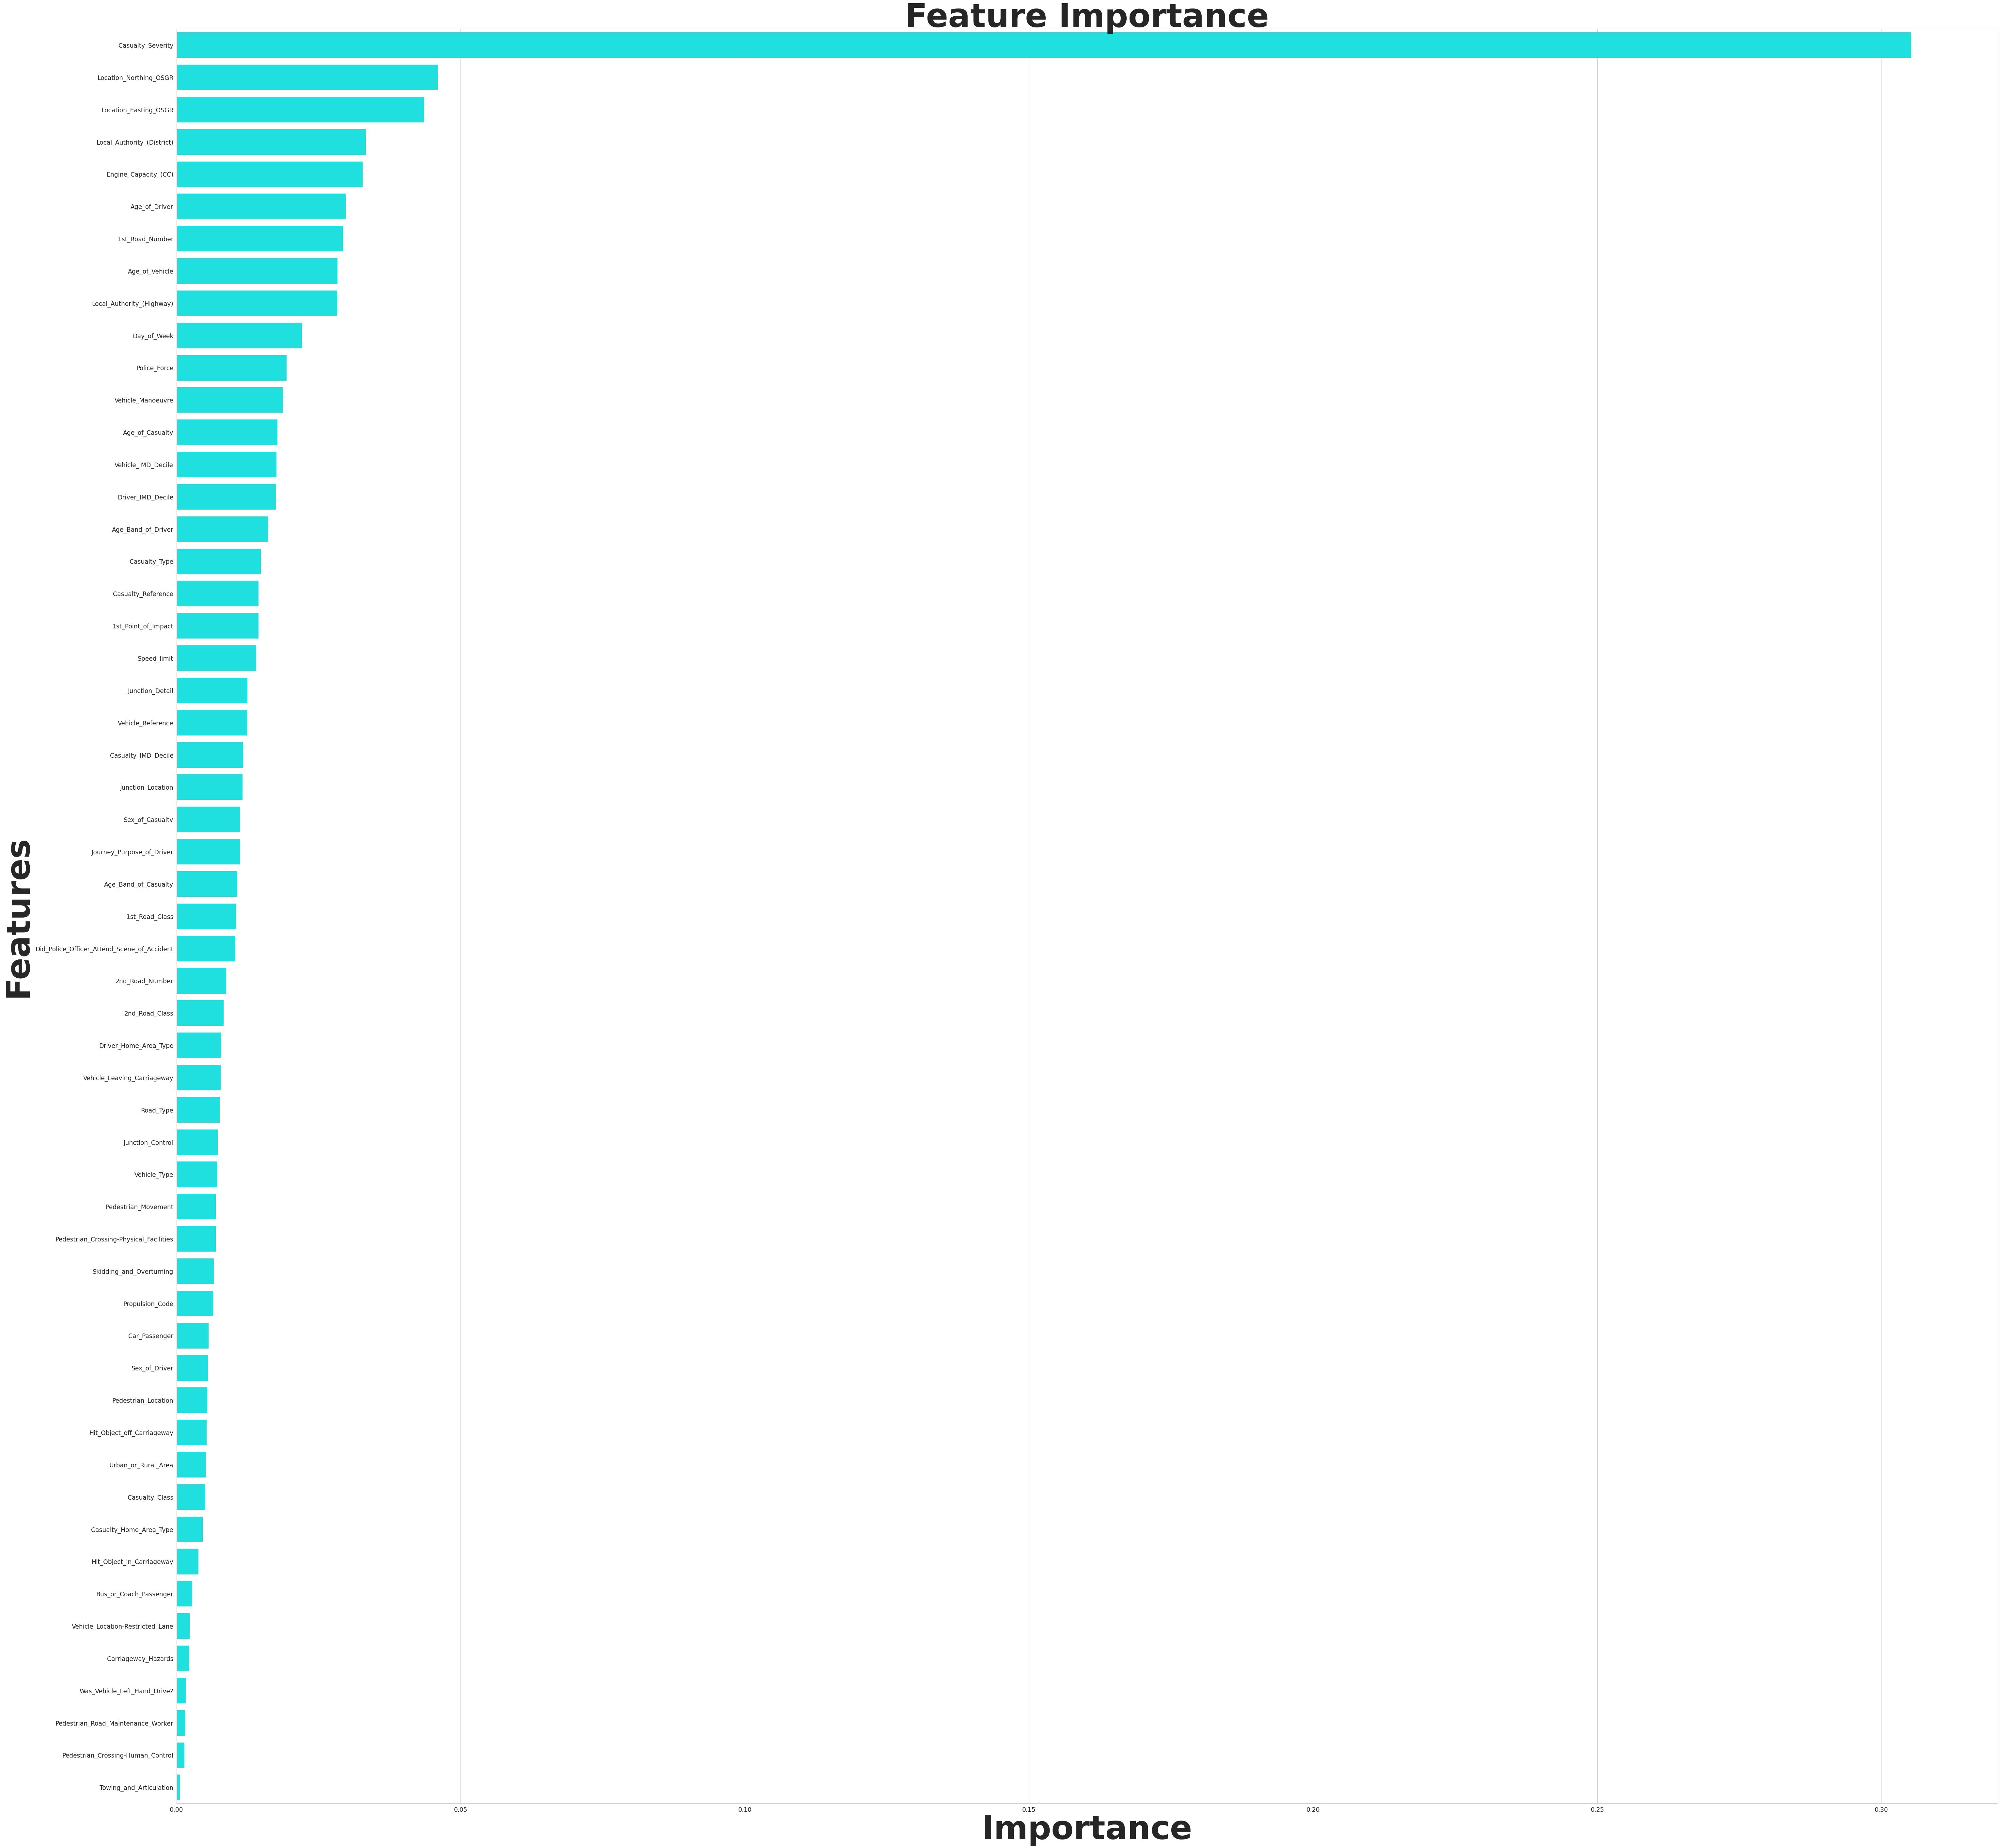

None

In [ ]:
feats = {}
for feature, importance in zip(dst_X.columns, model.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 25)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(100,100)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='cyan')
plt.xlabel('Importance', fontsize=100, weight = 'bold')
plt.ylabel('Features', fontsize=100, weight = 'bold')
plt.title('Feature Importance', fontsize= 100, weight = 'bold')
display(plt.show())

In [ ]:
#selecting predictors from the above features
predictors = df2[['Did_Police_Officer_Attend_Scene_of_Accident' , 'Age_of_Driver' ,'Vehicle_Type', 'Age_of_Vehicle',
                             'Engine_Capacity_(CC)','Day_of_Week' , 'Road_Type',
                             'Sex_of_Driver' ,'Speed_limit','Pedestrian_Location','Junction_Control','Road_Type','Urban_or_Rural_Area']]

No handles with labels found to put in legend.


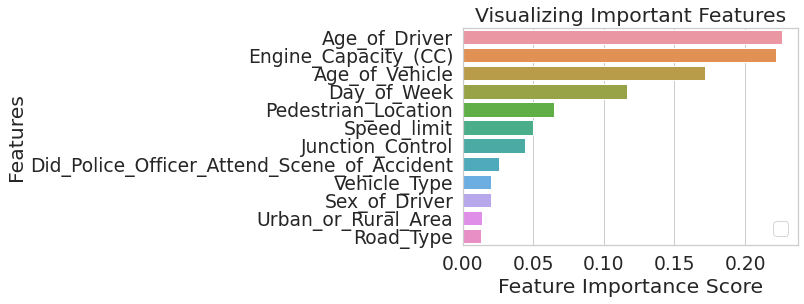

In [ ]:
feature_imp = pd.Series(random_forest.feature_importances_,index=predictors.columns).sort_values(ascending=False)
# Creating a bar plot, displaying only the top k features
k=13
sns.barplot(x=feature_imp[:13], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
#selecting X and y parameters
X= predictors
y=df2['Accident_Severity']

In [ ]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(predictors.values, 
                                              df2['Accident_Severity'].values,test_size=0.20, random_state=99)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(123644, 13)
(30912, 13)
(123644,)
(30912,)


In [ ]:
#imbalanced dataset
df2['Accident_Severity'].value_counts()

2    119339
1     32296
0      2921
Name: Accident_Severity, dtype: int64

**TRAINING THE ORIGINAL DATASET**

**RANDOM FOREST CLASSIFIER**

In [ ]:
#define the random forest model
random_forest = RandomForestClassifier(n_estimators=200)
#fit the model on the train data
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
#confusion matrix
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 78.05
              precision    recall  f1-score   support

           0   0.726708  0.191176  0.302717       612
           1   0.543282  0.210375  0.303302      6593
           2   0.802291  0.954275  0.871708     23707

    accuracy                       0.780506     30912
   macro avg   0.690760  0.451942  0.492576     30912
weighted avg   0.745552  0.780506  0.739212     30912



Predicted,0,1,2,All
Actual,,,,
0,117,105,390,612
1,21,1387,5185,6593
2,23,1061,22623,23707
All,161,2553,28198,30912


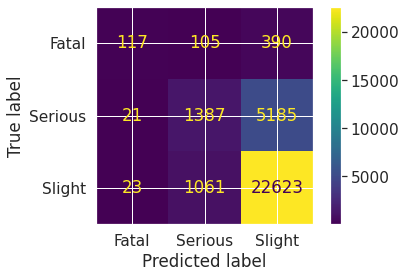

In [ ]:
from sklearn.metrics import plot_confusion_matrix
#plot confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(random_forest,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

**DECISION TREE**

In [ ]:
#define the decision tree model
decision_tree = DecisionTreeClassifier()
#fit the model on the training data
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
#pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 70.27
              precision    recall  f1-score   support

           0   0.234155  0.217320  0.225424       612
           1   0.337173  0.310784  0.323441      6593
           2   0.805168  0.824187  0.814566     23707

    accuracy                       0.702672     30912
   macro avg   0.458832  0.450764  0.454477     30912
weighted avg   0.694047  0.702672  0.698154     30912



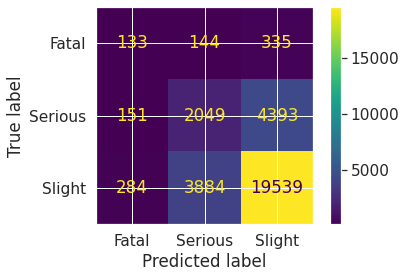

In [ ]:
#confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(decision_tree,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

**LOGISTIC REGRESSION**

In [ ]:
#define the logistic regression model
lr = LogisticRegression()
# Fit the model on the training data.
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
#pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 76.75
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       612
           1   0.497630  0.015926  0.030864      6593
           2   0.769323  0.996288  0.868218     23707

    accuracy                       0.767469     30912
   macro avg   0.422318  0.337405  0.299694     30912
weighted avg   0.696145  0.767469  0.672436     30912



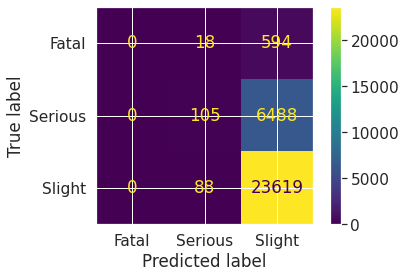

In [ ]:
#plot confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(lr,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

**K NEAREST NEIGBORS (K-NN)**

In [ ]:
KNeighbors_classifier = KNeighborsClassifier()                                      # define the K nearest neighbours model
KNeighbors=KNeighbors_classifier.fit(X_train,y_train)                               # train our K nearest neighbours model with the x and y training sets
kn_preds = KNeighbors.predict(X_test)

test_report_kn = classification_report(y_test, kn_preds)
# print the performace measures
print(test_report_kn)
print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test, kn_preds))

              precision    recall  f1-score   support

           0       0.15      0.09      0.12       612
           1       0.36      0.18      0.24      6593
           2       0.79      0.91      0.85     23707

    accuracy                           0.74     30912
   macro avg       0.44      0.39      0.40     30912
weighted avg       0.69      0.74      0.70     30912

Accuracy of KNeighbors Classifier: 0.7387422360248447


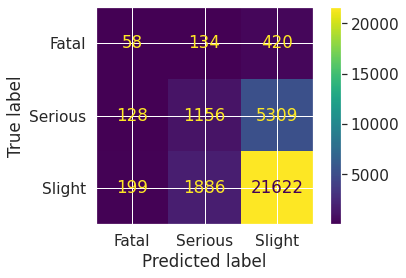

In [ ]:
#plot confusion matrix
sns.set(font_scale=1.4)
class_sentiment =['Fatal', 'Serious','Slight']
plot_confusion_matrix(KNeighbors_classifier,X_test,y_test, normalize =None, values_format='.0f',display_labels =class_sentiment)

**MODEL STACKING**

In [ ]:
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    return models

In [ ]:
def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(predictors,df2['Accident_Severity'],test_size=.25,random_state=1)
    return X_train, y_train

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, 
error_score='raise')
    return scores

In [ ]:
#Grab hold of the dataset.
X, y = get_dataset()
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.699 (0.004)
>rf 0.781 (0.003)
>lr 0.771 (0.002)
>knn 0.741 (0.003)


In [ ]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('rf', RandomForestClassifier()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0,final_estimator=level1, cv=5)
    return model  

In [ ]:
def get_model():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['stacked'] = get_stacking()
    return models

>dtree 0.699 (0.004)
>rf 0.780 (0.002)
>lr 0.771 (0.002)
>knn 0.741 (0.003)
>stacked 0.787 (0.002)


{'boxes': [<matplotlib.lines.Line2D at 0x7f3fde2875d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3fde1f01d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fde1f7750>,
 'means': [<matplotlib.lines.Line2D at 0x7f3fde1f7210>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3fde1f0c90>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3fde287e50>,
  <matplotlib.lines.Line2D at 0x7f3fde1be8d0>]}

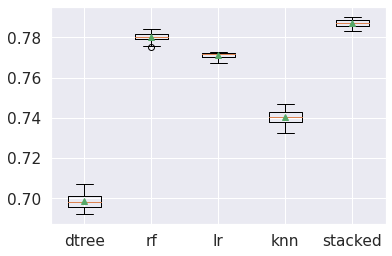

In [ ]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_model()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)

**SMOTE OVERSAMPLING TECHNIQUES FOR HANDLING IMBALANCED DATASET**

In [ ]:
sm = SMOTE()

X=np.array(X)

X, y = sm.fit_resample(X, y.ravel())

In [ ]:
# Oversampling
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)
## train test split
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X,y,test_size=0.2,random_state=42)
#setting 20% aside as validation data for cross validation
x_train_t, x_train_v, y_train_t, y_train_v = train_test_split(X_train_over, y_train_over, test_size = 0.2, random_state = 42)

In [ ]:
pd.Series(y).value_counts()

2    89526
0    89526
1    89526
dtype: int64

**RANDOM FOREST FOR OVERSAMPLED DATASET**

In [ ]:
#define the model
random_forest = RandomForestClassifier(n_estimators=200)
#fit the model
random_forest.fit(X_train_over,y_train_over)
Y_pred = random_forest.predict(X_test_over)
random_forest.score(X_test_over, y_test_over)
acc_random_forest1 = round(random_forest.score(X_test_over, y_test_over) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test_over, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test_over, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 81.03
              precision    recall  f1-score   support

           0   0.875983  0.948238  0.910680     17967
           1   0.744268  0.731481  0.737819     17928
           2   0.803508  0.750575  0.776140     17821

    accuracy                       0.810317     53716
   macro avg   0.807920  0.810098  0.808213     53716
weighted avg   0.807978  0.810317  0.808351     53716



Predicted,0,1,2,All
Actual,,,,
0,17037,762,168,17967
1,1711,13114,3103,17928
2,701,3744,13376,17821
All,19449,17620,16647,53716


**LOGISTIC REGRESSION FOR OVERSAMPLED DATASET**

In [ ]:
#define the model
lr = LogisticRegression()
# Fit the model on the training data.
lr.fit(X_train_over, y_train_over)
y_pred = lr.predict(X_test_over)
sk_report = classification_report(
    digits=6,
    y_true=y_test_over, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test_over)*100,2))
print(sk_report)
pd.crosstab(y_test_over, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 53.26
              precision    recall  f1-score   support

           0   0.552840  0.663550  0.603157     17967
           1   0.439160  0.320895  0.370826     17928
           2   0.574038  0.613658  0.593187     17821

    accuracy                       0.532635     53716
   macro avg   0.522013  0.532701  0.522390     53716
weighted avg   0.521932  0.532635  0.522308     53716



Predicted,0,1,2,All
Actual,,,,
0,11922,4040,2005,17967
1,6065,5753,6110,17928
2,3578,3307,10936,17821
All,21565,13100,19051,53716


**DECISION TREE FOR OVERSAMPLED DATASET**

In [ ]:
#define the model
decision_tree = DecisionTreeClassifier()
#fit the model on training data
decision_tree.fit(X_train_over, y_train_over)
Y_pred = decision_tree.predict(X_test_over)
acc_decision_tree1 = round(decision_tree.score(X_test_over, y_test_over) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test_over, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test_over, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 77.5
              precision    recall  f1-score   support

           0   0.854367  0.942339  0.896199     17967
           1   0.685391  0.720716  0.702610     17928
           2   0.782747  0.660906  0.716685     17821

    accuracy                       0.775002     53716
   macro avg   0.774169  0.774654  0.771831     53716
weighted avg   0.774210  0.775002  0.772032     53716



Predicted,0,1,2,All
Actual,,,,
0,16931,836,200,17967
1,1938,12921,3069,17928
2,948,5095,11778,17821
All,19817,18852,15047,53716


**K-NN FOR OVERSAMPLED DATASET**

In [ ]:
KNeighbors_classifier = KNeighborsClassifier()                                      # define the K nearest neighbours model
KNeighbors=KNeighbors_classifier.fit(X_train_over,y_train_over)                     # train our K nearest neighbours model with the x and y training sets
kn_preds = KNeighbors.predict(X_test_over)
test_report_kn = classification_report(y_test_over, kn_preds)
# print the performace measures
print(test_report_kn)

print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test_over, kn_preds))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87     17967
           1       0.68      0.79      0.73     17928
           2       0.84      0.55      0.67     17821

    accuracy                           0.77     53716
   macro avg       0.78      0.76      0.76     53716
weighted avg       0.78      0.77      0.76     53716

Accuracy of KNeighbors Classifier: 0.7651537716881376


**MODEL STACKING FOR SMOTE BALANCED DATASET**

In [ ]:
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    return models

In [ ]:
def get_dataset1():
    X_train_over, X_validation, y_train_over, y_validation = train_test_split(X,y,test_size=.25,random_state=1)
    return X_train_over, y_train_over

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, 
error_score='raise')
    return scores

In [ ]:
#Grab hold of the dataset.
X, y = get_dataset1 
()
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.767 (0.003)
>rf 0.805 (0.003)
>lr 0.527 (0.010)
>knn 0.752 (0.003)


In [ ]:
from sklearn.ensemble import StackingClassifier
def get_stacking():
    level0 = list()
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('rf', RandomForestClassifier()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0,final_estimator=level1, cv=5)
    return model  

In [ ]:
# define dataset
X, y = get_dataset1()
# get the models to evaluate
models = get_model()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
#pyplot.boxplot(results, labels=names, showmeans=True)

>dtree 0.752 (0.003)
>rf 0.790 (0.003)
>lr 0.528 (0.009)
>knn 0.729 (0.004)
>stacked 0.813 (0.003)


{'boxes': [<matplotlib.lines.Line2D at 0x7f3fdd7eac50>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3fdd7f0d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f3fdd7fd2d0>,
 'means': [<matplotlib.lines.Line2D at 0x7f3fdd7f4d50>,
 'medians': [<matplotlib.lines.Line2D at 0x7f3fdd7f4810>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f3fdd7f0290>,
  <matplotlib.lines.Line2D at 0x7f3fde2505d0>]}

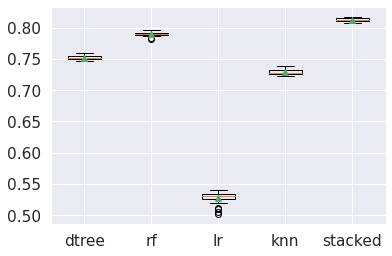

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)

**FEATURE SELECTION USING PRINCIPAL COMPONENT ANALYSIS**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pca = PCA(56)
# prepare transform on dataset
pca.fit(df2)
# apply transform to dataset
transformed = pca.transform(df2)

In [ ]:
# define the pipeline
steps = [('pca', PCA()), ('m', LogisticRegression())]
model = Pipeline(steps=steps)

In [ ]:
## Prints the number of Components which will have a total variance of 99%.
print(pca.n_components_)

56


In [ ]:
## print explained variance
print(pca.explained_variance_)

[6.65501099e+08 3.15157079e+08 6.91819273e+05 2.13212737e+05
 3.34353445e+04 8.64578736e+03 1.86956230e+03 5.46580632e+02
 2.52742152e+02 5.02704555e+01 2.35032997e+01 1.73578012e+01
 1.10611911e+01 8.93207723e+00 7.76369034e+00 5.99996470e+00
 4.90812377e+00 4.78247356e+00 4.40200336e+00 4.22837401e+00
 3.28518144e+00 2.88478521e+00 1.89848431e+00 1.76946923e+00
 1.71038183e+00 1.32890994e+00 1.03587567e+00 1.01609609e+00
 9.23816570e-01 8.67758833e-01 7.47156548e-01 5.73567730e-01
 5.43368339e-01 4.92561301e-01 4.57990473e-01 4.44917775e-01
 3.67675188e-01 3.45208454e-01 3.34380065e-01 2.91407284e-01
 2.76314556e-01 2.34789619e-01 2.16143434e-01 1.83483152e-01
 1.65045944e-01 1.50462861e-01 1.47838490e-01 1.01153315e-01
 9.05103844e-02 6.19270969e-02 6.07548985e-02 5.27908620e-02
 5.11451620e-02 2.83737007e-02 2.50111223e-02 4.81435738e-24]


In [ ]:
## print commulative variance 
cum = pca.explained_variance_ratio_.cumsum()
print(cum)

[0.67797024 0.99903225 0.99973703 0.99995424 0.9999883  0.99999711
 0.99999902 0.99999957 0.99999983 0.99999988 0.99999991 0.99999992
 0.99999993 0.99999994 0.99999995 0.99999996 0.99999996 0.99999997
 0.99999997 0.99999998 0.99999998 0.99999998 0.99999998 0.99999999
 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999 0.99999999
 0.99999999 0.99999999 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.        ]


In [ ]:
# Taking only 10 PCs
pca = PCA(n_components=10)

X_PC=pca.fit_transform(dataset_x)

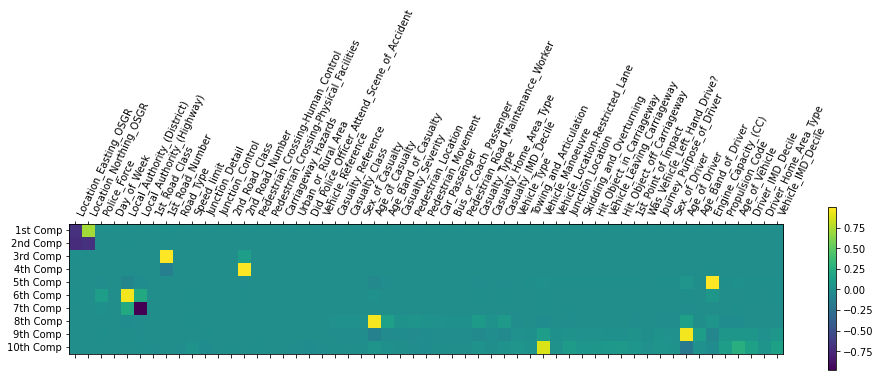

In [ ]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8,9],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp','6th Comp'
                                 ,'7th Comp','8th Comp','9th Comp','10th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(dataset_x.columns.values)),dataset_x.columns.values,rotation=65,ha='left')
plt.tight_layout()
plt.show();

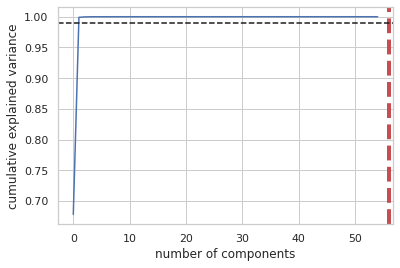

None

In [ ]:
pca_test = PCA()
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=56, ymin=0, ymax=1)
plt.axhline(y = 0.99, color='k', linestyle='--', label = '99% Explained Variance')
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

In [ ]:
display(pca_df.head(10))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.678321,6.783209e-01
1,0.999033,3.207119e-01
2,0.999739,7.062916e-04
3,0.999954,2.151648e-04
4,0.999988,3.403448e-05
5,0.999997,8.802407e-06
6,0.999999,1.907347e-06
7,1.000000,5.575669e-07
8,1.000000,2.561442e-07
9,1.000000,5.112700e-08


we will not be using the PCA has it returned the same number of columns hence we continue training with our predictors.

**BALANCING DATASET USING RANDOM UNDERSAMPLER**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.datasets import make_classification

In [ ]:
# define undersample strategy
undersample = RandomUnderSampler(random_state=0)

In [ ]:
# fit and apply the transform
X_over, y_over = undersample.fit_resample(dataset_x,dataset_y)

In [ ]:
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
# fit and apply the transform
X_over, y_over = undersample.fit_resample(dataset_x, dataset_y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({1: 32296, 0: 2921, 2: 2921})


In [ ]:
pd.Series(y_over).value_counts()

1    32296
0     2921
2     2921
Name: Accident_Severity, dtype: int64

**RANDOM FOREST FOR UNDERSAMPLED DATASET**

In [ ]:
#define the model
random_forest = RandomForestClassifier(n_estimators=200)
#fit the model on the train data
random_forest.fit(X_over,y_over)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 34.17
              precision    recall  f1-score   support

           0   0.998319  1.000000  0.999159       594
           1   0.242865  1.000000  0.390815      6527
           2   1.000000  0.144677  0.252782     23791

    accuracy                       0.341712     30912
   macro avg   0.747061  0.714892  0.547585     30912
weighted avg   0.840100  0.341712  0.296269     30912



Predicted,0,1,2,All
Actual,,,,
0,594,0,0,594
1,0,6527,0,6527
2,1,20348,3442,23791
All,595,26875,3442,30912


**LOGISTIC REGRESSION FOR UNDERSAMPLED DATASET**

In [ ]:
#define the model
lr = LogisticRegression()
# Fit the model on the trainng data.
lr.fit(X_over, y_over)
y_pred = lr.predict(X_test)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred)
print("Accuracy", round(accuracy_score(y_pred, y_test)*100,2))
print(sk_report)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 21.11
              precision    recall  f1-score   support

           0   0.000000  0.000000  0.000000       594
           1   0.211148  1.000000  0.348674      6527
           2   0.000000  0.000000  0.000000     23791

    accuracy                       0.211148     30912
   macro avg   0.070383  0.333333  0.116225     30912
weighted avg   0.044583  0.211148  0.073622     30912



Predicted,1,All
Actual,,
0,594,594
1,6527,6527
2,23791,23791
All,30912,30912


**DECISION TREE FOR UNDERSAMPLED DATASET**

In [ ]:
#define the model
decision_tree = DecisionTreeClassifier()
#fit the model on the train data
decision_tree.fit(X_over, y_over)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree1 = round(decision_tree.score(X_test, y_test) * 100, 2)
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy", acc_decision_tree1)
print(sk_report)
### Confusion Matrix 
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 49.62
              precision    recall  f1-score   support

           0   0.414515  1.000000  0.586088       594
           1   0.307008  1.000000  0.469788      6527
           2   1.000000  0.345467  0.513527     23791

    accuracy                       0.496247     30912
   macro avg   0.573841  0.781822  0.523134     30912
weighted avg   0.842426  0.496247  0.505686     30912



Predicted,0,1,2,All
Actual,,,,
0,594,0,0,594
1,0,6527,0,6527
2,839,14733,8219,23791
All,1433,21260,8219,30912


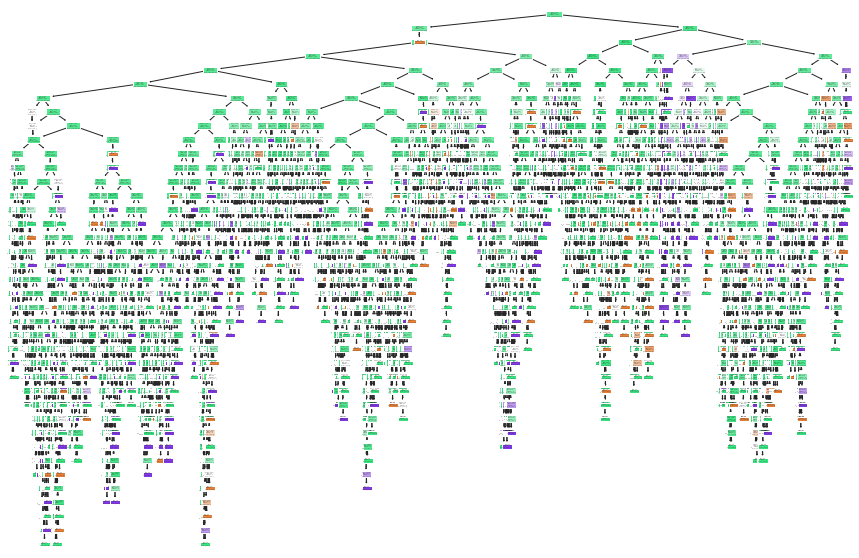

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(decision_tree,filled=True)
plt.show()

**K-NN FOR UNDERSAMPLED DATASET**

In [ ]:
KNeighbors_classifier = KNeighborsClassifier()                                      # define the K nearest neighbours model
KNeighbors=KNeighbors_classifier.fit(X_over,y_over)                               # train our K nearest neighbours model with the x and y training sets
kn_preds = KNeighbors.predict(X_test)
test_report_kn = classification_report(y_test, kn_preds)
# print the performace measures
print(test_report_kn)

print("Accuracy of KNeighbors Classifier:", metrics.accuracy_score(y_test, kn_preds))

              precision    recall  f1-score   support

           0       0.21      0.53      0.30       594
           1       0.22      0.98      0.36      6527
           2       0.95      0.02      0.04     23791

    accuracy                           0.23     30912
   macro avg       0.46      0.51      0.24     30912
weighted avg       0.78      0.23      0.12     30912

Accuracy of KNeighbors Classifier: 0.23379270186335405


**MODEL STACKING FOR RANDOM UNDERSAMPLED DATASET**

In [ ]:
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    return models

In [ ]:
def get_dataset():
    X_train, X_validation, y_train, y_validation = train_test_split(X_over,y_over,test_size=.25,random_state=1)
    return X_train, y_train

In [ ]:
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, 
error_score='raise')
    return scores

In [ ]:
#Grab hold of the dataset.
X, y = get_dataset()
#Grab the models to use.
models = get_models()
#Run and Evaluate the models.
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>dtree 0.831 (0.006)
>rf 0.896 (0.003)
>lr 0.847 (0.000)
>knn 0.837 (0.004)


In [ ]:
def get_stacking():
    level0 = list()
    level0.append(('dtree', DecisionTreeClassifier()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('lr', LogisticRegression()))
    level0.append(('rf', RandomForestClassifier()))
    level1 = LogisticRegression()
    model = StackingClassifier(estimators=level0,final_estimator=level1, cv=5)
    return model  

In [ ]:
def get_models():
    models = dict()
    models['dtree'] = DecisionTreeClassifier()
    models['rf'] = RandomForestClassifier()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['stacked'] = get_stacking()
    return models


>dtree 0.831 (0.006)
>rf 0.897 (0.003)
>lr 0.847 (0.000)
>knn 0.837 (0.004)
>stacked 0.905 (0.003)


{'boxes': [<matplotlib.lines.Line2D at 0x7feb2d296950>,
 'caps': [<matplotlib.lines.Line2D at 0x7feb2d29aa10>,
 'fliers': [<matplotlib.lines.Line2D at 0x7feb2d2a1f90>,
 'means': [<matplotlib.lines.Line2D at 0x7feb2d28ae10>,
 'medians': [<matplotlib.lines.Line2D at 0x7feb2d2a1510>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7feb2d296f50>,
  <matplotlib.lines.Line2D at 0x7feb2d2711d0>]}

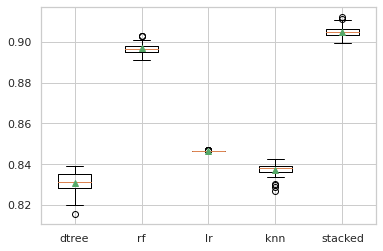

In [ ]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)

**PREDICTING USING GOVERNMENT MODEL**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving cas_adjustment_lookup_2019.csv to cas_adjustment_lookup_2019.csv


In [87]:
gov_df=pd.read_csv("cas_adjustment_lookup_2019.csv")
gov_df

,accident_index,Vehicle_Reference,Casualty_Reference,Adjusted_Serious,Adjusted_Slight,Injury_Based
0,200401BS00001,1,1,0.239280,0.760720,0
1,200401BS00002,1,1,1.000000,0.000000,0
2,200401BS00003,1,1,0.057141,0.942859,0
3,200401BS00003,1,2,0.048599,0.951401,0
4,200401BS00004,1,1,0.187000,0.813000,0
...,...,...,...,...,...,...
3314732,2019984106919,1,1,0.183336,0.816664,0
3314733,2019984107019,1,1,0.074588,0.925412,0
3314734,2019984107219,2,1,0.048524,0.951476,0
3314735,2019984107419,1,1,0.183316,0.816684,0


In [88]:
my_df = pd.read_csv('Data_cleaned.csv')   

In [92]:
#creating uniformity for accident index header
gov_df.rename({'accident_index': 'Accident_Index'}, axis = 1, inplace = True)

In [95]:
# inner join accident dataset with casualty and vehicle dataset
merged_dataset = pd.merge(my_df, gov_df, on=['Accident_Index', 'Casualty_Reference', 'Vehicle_Reference'], how ='inner')

In [129]:
merged_dataset 

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile,Adjusted_Serious,Adjusted_Slight,Injury_Based,max,num
0,2019051912392,341773.0,389622.0,-2.877198,53.400211,5,Slight,2,1,2019-09-12,...,Petrol,10.0,1.0,1.0,1.0,0.044497,0.955503,0,Adjusted_Slight,3
1,2019051912393,347937.0,402486.0,-2.786636,53.516474,5,Slight,3,2,2019-06-14,...,Heavy Oil,14.0,6.0,3.0,6.0,0.120189,0.879811,0,Adjusted_Slight,3
2,2019051912393,347937.0,402486.0,-2.786636,53.516474,5,Slight,3,2,2019-06-14,...,NaN,NaN,NaN,NaN,NaN,0.134917,0.865083,0,Adjusted_Slight,3
3,2019051912396,337382.0,399740.0,-2.945245,53.490641,5,Slight,2,2,2019-09-10,...,Heavy Oil,2.0,8.0,1.0,8.0,0.068461,0.931539,0,Adjusted_Slight,3
4,2019051912396,337382.0,399740.0,-2.945245,53.490641,5,Slight,2,2,2019-09-10,...,NaN,NaN,NaN,NaN,NaN,0.048242,0.951758,0,Adjusted_Slight,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26516,2019984106019,341523.0,579842.0,-2.918177,55.109520,98,Serious,1,1,2019-05-12,...,Petrol,13.0,10.0,1.0,10.0,1.000000,0.000000,0,Adjusted_Serious,2
26517,2019984106719,311177.0,574940.0,-3.392193,55.060971,98,Serious,1,1,2019-05-21,...,Heavy Oil,17.0,7.0,3.0,7.0,1.000000,0.000000,0,Adjusted_Serious,2
26518,2019984106819,303932.0,610445.0,-3.517671,55.378549,98,Slight,3,2,2019-05-30,...,Petrol,3.0,5.0,3.0,5.0,0.080213,0.919787,0,Adjusted_Slight,3
26519,2019984106919,312635.0,573392.0,-3.368899,55.047323,98,Slight,1,1,2019-05-18,...,Heavy Oil,14.0,6.0,3.0,6.0,0.183336,0.816664,0,Adjusted_Slight,3


In [98]:
#returns a Series with the index of the maximum value for each row.
merged_dataset['max'] =merged_dataset[['Adjusted_Serious', 'Adjusted_Slight']].idxmax(axis=1)

In [119]:
merged_dataset['max'].head()

0    Adjusted_Slight
1    Adjusted_Slight
2    Adjusted_Slight
3    Adjusted_Slight
4    Adjusted_Slight
Name: max, dtype: object

In [120]:
#Creating function to select our cas data
def convert_to_num(cas):
    if cas == 'Adjusted_Slight':
        return 3
    else:
        return 2

In [121]:
#converting it to numerical value
merged_dataset['num'] = merged_dataset['max'].apply(convert_to_num)


In [134]:
merged_dataset['Accident_Severity'].value_counts()

3    17224
2     8855
1      442
Name: Accident_Severity, dtype: int64

In [135]:
#Comparing our model
gov_predict = merged_dataset['num']
actual = merged_dataset['Accident_Severity']

In [137]:
print('Accuracy Score:',metrics.accuracy_score(actual,gov_predict))

Accuracy Score: 0.9184419893669168
